# Statistical Analyses - IPL Cricket Matches 0-An Intro

 To demonstrate these statistical concepts using code, we can use Python, a popular programming language in data science. We'll use Python's libraries like numpy for numerical operations and matplotlib for plotting. This example assumes you have a basic understanding of Python.

# Step 1: Setting Up the Environment

First, make sure you have Python installed on your computer. You'll also need to install the necessary libraries. You can do this using pip:

In [1]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


# Step 2: Importing Libraries

Now, let's import these libraries in a Python script or a Jupyter notebook:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 3: Loading IPL Matches Dataset

### Report Summary: Cricket Matches Dataset

#### Dataset Source:
The dataset was obtained from https://www.kaggle.com/datasets/manasgarg/ipl/data?select=matches.csv, covering cricket matches played in 2008 to 2017.

#### Dataset Size:
The dataset comprises 636 entries and 18 columns.

#### Description of Variables:

season: The year or season in which the match took place.


city: The city where the match was held.

date: The date of the match.

team1, team2: The competing teams in the match.

toss_winner: The team winning the toss.

toss_decision: The decision made by the toss-winning team (bat/field).

result: The result of the match (normal/tie/no result).

dl_applied: Whether the Duckworth-Lewis method was applied (binary: yes/no or 0 or 1).

winner: The winning team of the match.


win_by_runs: The margin of victory in terms of runs.


win_by_wickets: The margin of victory in terms of wickets.


player_of_match: The player awarded as the Man of the Match.

In [268]:
ds_matches = pd.read_csv("matches.csv")

ds_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           636 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

# Step 4:Taking a sample of IPL Cricket Matches 


In [218]:
ds_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [267]:
sorted(ds_matches['season'].unique())

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# Step 5: Exploring Variables and Distributions

We'll plot the distribution of our sample.

### Interest and Statistical Analysis:

This dataset is compelling due to its rich information about cricket matches, including details on teams, match outcomes, winning margins, and player performances.

# EDA: Exploratory Data Analyses

Exploratory Data Analysis (EDA) involves understanding the dataset by cleaning, visualizing, and conducting preliminary analysis to identify patterns, outliers, and insights.

Data Cleaning:
Before EDA, it's essential to clean the data, handling missing values and outliers if necessary. Here's an example of handling missing values and removing unnecessary columns:

In [31]:
import pandas as pd

# Load the India premier League Cricket dataset

# https://www.kaggle.com/datasets/manasgarg/ipl/data?select=matches.csv
# above mentioned link for matches dataset
ds_cric = pd.read_csv('matches.csv')

# Handling missing values (e.g., filling missing ages with the median)
ds_cric['win_by_runs'].fillna(ds_cric['win_by_runs'].median(), inplace=True)
ds_cric['win_by_wickets'].fillna(ds_cric['win_by_wickets'].median(), inplace=True)

ds_cric.drop('umpire1', axis=1, inplace=True)
ds_cric.drop('umpire2', axis=1, inplace=True)
ds_cric.drop('umpire3', axis=1, inplace=True)

# Now, you can proceed with EDA on the dataset
# Visualizations, summary statistics, and analysis as mentioned in previous responses.
ds_cric

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla


In [276]:
import pandas as pd

# Check the column names
column_names = ds_cric.columns
print("Column Names:", column_names)


Column Names: Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')


It offers ample opportunities for statistical analysis, including:

Visualizations: Use various plots (bar plots, histograms, pie charts, etc.) to explore relationships 

1.Exploring the relationship between toss-winning teams and match winners.

In [32]:
import pandas as pd

# Counting occurrences of matches where the toss winner is the same as the match winner
ds = ds_cric[ds_cric['toss_winner'] == ds_cric['winner']]

# Calculating the total number of matches and matches where toss winner = match winner
total_matches = len(ds_cric)
common_winner_count = len(common_winner)

# Calculate the percentage of matches where toss winner is the same as match winner
percentage_common_winner = (common_winner_count / total_matches) * 100

print(f"Total Matches: {total_matches}")
print(f"Matches where Toss Winner = Match Winner: {common_winner_count}")
print(f"Percentage of Matches where Toss Winner = Match Winner: {percentage_common_winner:.2f}%")



Total Matches: 636
Matches where Toss Winner = Match Winner: 325
Percentage of Matches where Toss Winner = Match Winner: 51.10%


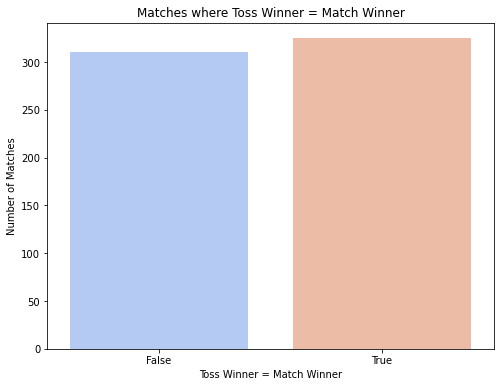

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cricket_data' is your dataset containing cricket match information

# Counting occurrences of matches where the toss winner is the same as the match winner
ds_cric['same_winner'] = ds_cric['toss_winner'] == ds_cric['winner']

# Plotting the count of matches where toss winner is the same as match winner
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x='same_winner', palette='coolwarm')
plt.title('Matches where Toss Winner = Match Winner')
plt.xlabel('Toss Winner = Match Winner')
plt.ylabel('Number of Matches')
plt.xticks([0, 1], ['False', 'True'])  # Setting x-axis labels
plt.show()


2.Analyzing the impact of toss decisions on match outcomes.

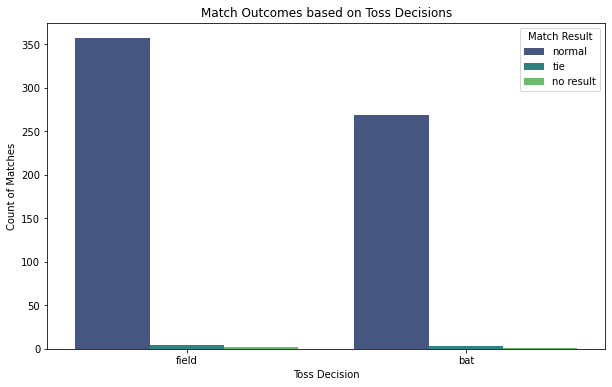

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ds_cric, x='toss_decision', hue='result', palette='viridis')
plt.title('Match Outcomes based on Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count of Matches')
plt.legend(title='Match Result')
plt.show()


3.Studying trends in winning margins (runs/wickets) over different seasons or teams.

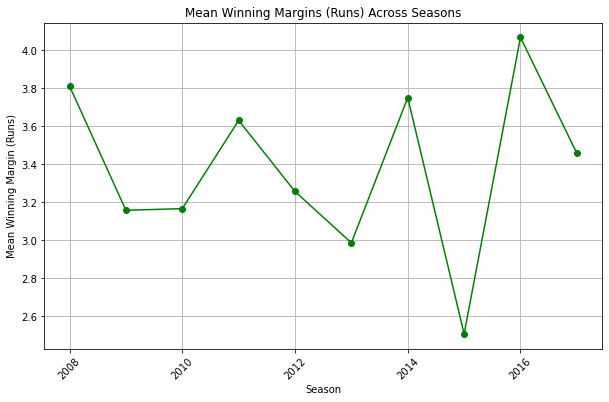

In [53]:
season_win_margin = ds_cric.groupby('season')['win_by_wickets'].mean()
plt.figure(figsize=(10, 6))
season_win_margin.plot(marker='o', color='green')
plt.title('Mean Winning Margins (Runs) Across Seasons')
plt.xlabel('Season')
plt.ylabel('Mean Winning Margin (Runs)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Data Visualization:
Visualization helps identify patterns and insights. Here are some common visualizations:

1. Histograms:

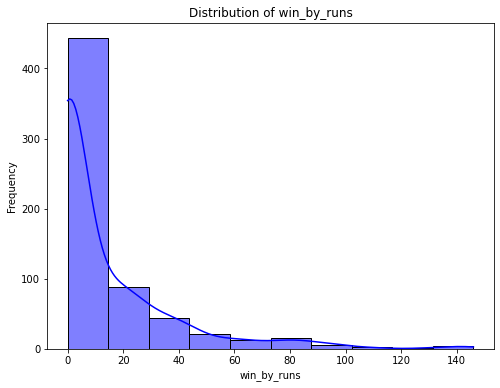

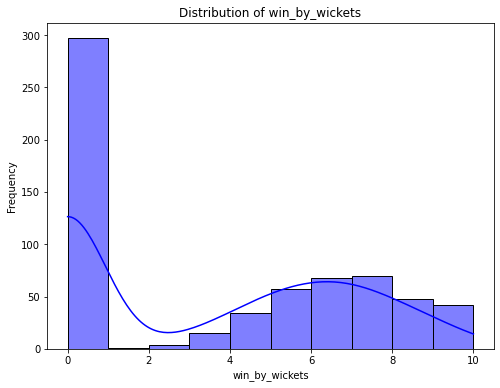

In [235]:
wicket_runs_cols = ['win_by_runs', 'win_by_wickets']
for col in wicket_runs_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=ds_cric, x=col, bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

2. Bar Charts:

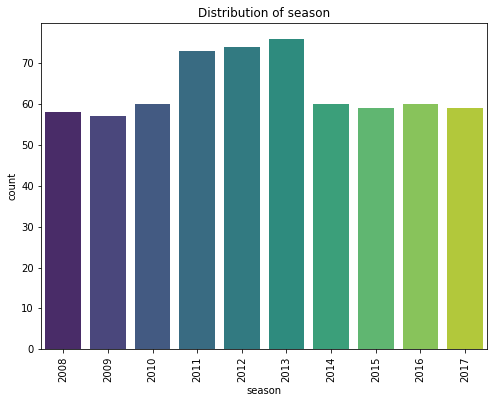

In [44]:
import matplotlib.pyplot as plt
matches_cols = ['season','city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner']

# Histogram of city distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[0], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[0]}')
plt.show()


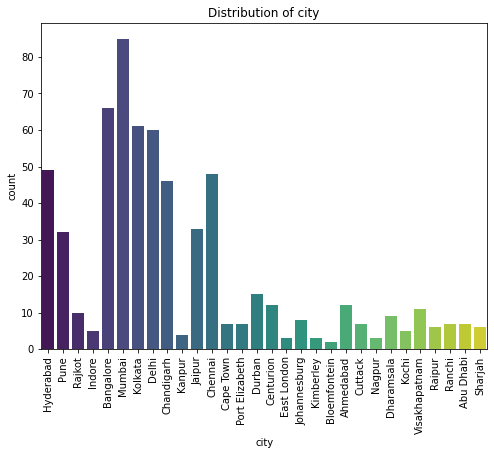

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[1], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[1]}')
plt.show()

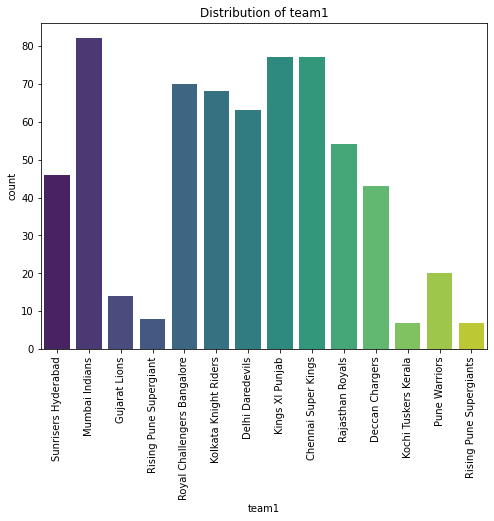

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[2], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[2]}')
plt.show()

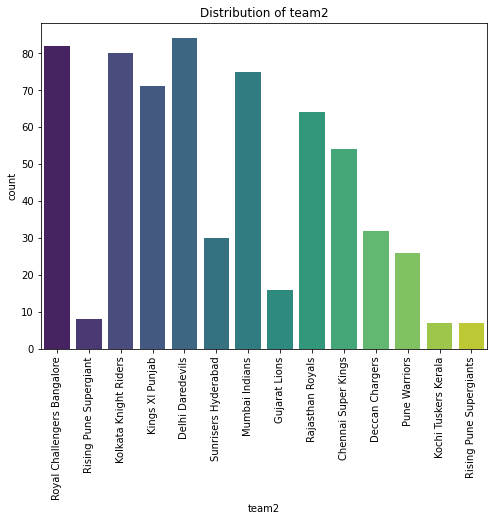

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[3], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[3]}')
plt.show()

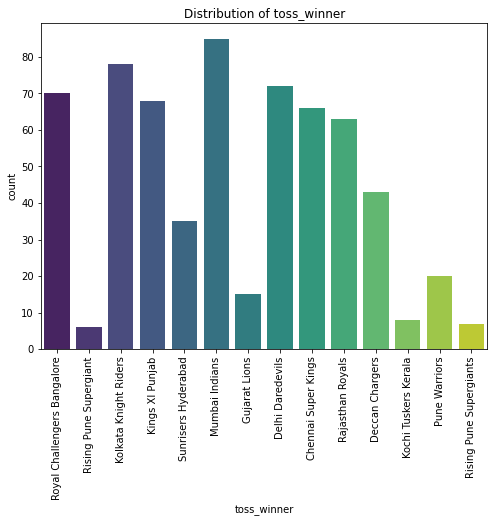

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[4], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[4]}')
plt.show()

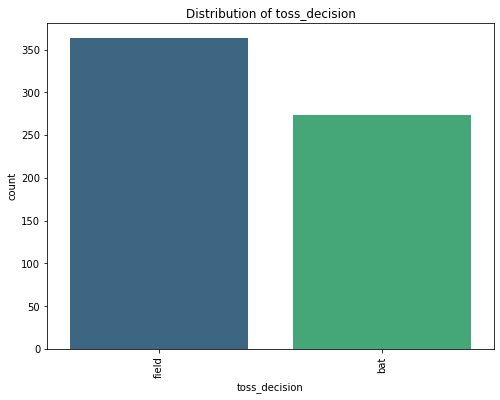

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[5], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[5]}')
plt.show()

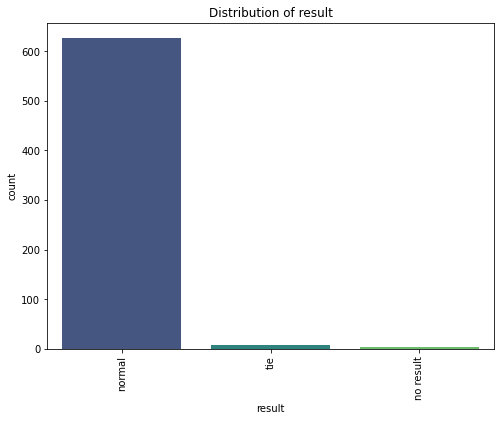

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[6], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[6]}')
plt.show()

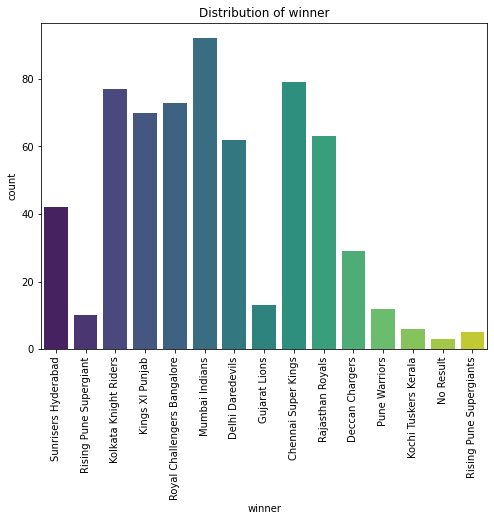

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_cric, x=matches_cols[7], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Distribution of {matches_cols[7]}')
plt.show()

3. Box Plots:

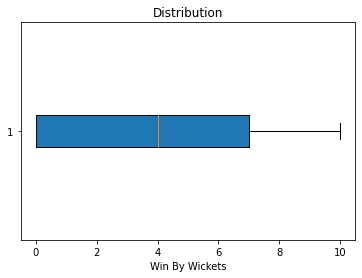

In [40]:
# Box plot of Result distribution
plt.boxplot(ds_cric['win_by_wickets'], vert=False, patch_artist=True)
plt.xlabel("Win By Wickets")
plt.title("Distribution")
plt.show()

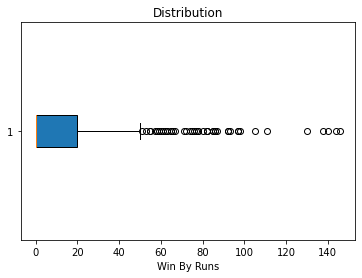

In [244]:
# Box plot of Result distribution
plt.boxplot(ds_cric['win_by_runs'], vert=False, patch_artist=True)
plt.xlabel("Win By Runs")
plt.title("Distribution")
plt.show()


Preliminary Statistical Analysis:
1. Summary Statistics:

In [245]:
# Summary statistics for numeric columns
summary_stats = ds_cric.describe()

# Summary statistics for categorical columns
class_summary = ds_cric['win_by_runs'].value_counts()
print("Summary Statistics for Win By Runs:")
print(summary_stats['win_by_runs'])
print("\nClass Summary:")
print(class_summary)


Summary Statistics for Win By Runs:
count    636.000000
mean      13.682390
std       23.908877
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      146.000000
Name: win_by_runs, dtype: float64

Class Summary:
0      349
9        9
23       9
7        9
10       9
      ... 
51       1
50       1
47       1
144      1
42       1
Name: win_by_runs, Length: 86, dtype: int64


In [246]:
class_summary = ds_cric['win_by_wickets'].value_counts()
print("Summary Statistics for Win by wickets:")
print(summary_stats['win_by_wickets'])
print("\nClass Summary:")
print(class_summary)

Summary Statistics for Win by wickets:
count    636.000000
mean       3.372642
std        3.420338
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: win_by_wickets, dtype: float64

Class Summary:
0     297
7      70
6      68
5      57
8      48
4      34
9      32
3      15
10     10
2       4
1       1
Name: win_by_wickets, dtype: int64


2. Correlation Analysis:

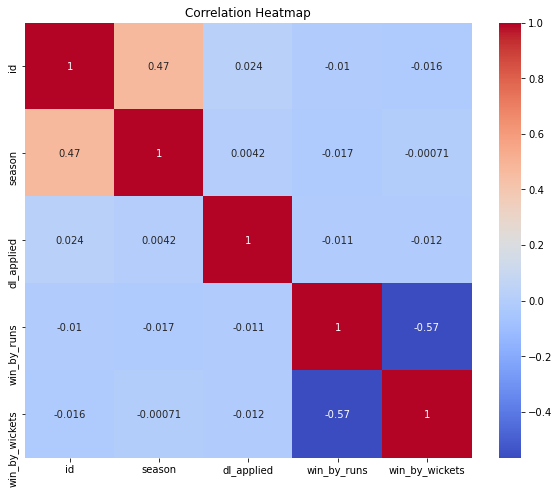

In [247]:
# Correlation matrix
correlation_matrix = ds_cric.corr()

# Heatmap of correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


We can calculate basic statistics for numeric columns like win_by_runs and win_by_wickets, and summarize categorical columns like toss_decision and result. Here's an example using Python and the Pandas library:

In [248]:
import pandas as pd

# Descriptive statistics for age and fare
win_by_runs_stats = ds_cric['win_by_runs'].describe()
win_by_wickets_stats = ds_cric['win_by_wickets'].describe()

# Summary of gender and class
toss_summary = ds_cric['toss_decision'].value_counts()
winner_summary = ds_cric['winner'].value_counts()

print("Descriptive Statistics for Win by runs:")
print(win_by_runs_stats)
print("\nDescriptive Statistics for :")
print(win_by_wickets_stats)
print("\nToss Decision Summary:")
print(toss_summary)
print("\nWinner Summary:")
print(winner_summary)


Descriptive Statistics for Win by runs:
count    636.000000
mean      13.682390
std       23.908877
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      146.000000
Name: win_by_runs, dtype: float64

Descriptive Statistics for :
count    636.000000
mean       3.372642
std        3.420338
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: win_by_wickets, dtype: float64

Toss Decision Summary:
field    363
bat      273
Name: toss_decision, dtype: int64

Winner Summary:
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala          

# Step 6: Measures of Central Tendency

Let's calculate the mean, median, and mode.

1. Mean (Average):
To calculate the mean (average) of a numeric column, such as "Win_by_runs", "win_by_wickets" in the Titanic dataset:

In [249]:
mean_win_by_runs = ds_cric['win_by_runs'].mean()
print(f"Mean Win By Runs: {mean_win_by_runs}")

mean_win_by_wickets = ds_matches['win_by_wickets'].mean()
print(f"Mean win by wickets : {mean_win_by_wickets}")

Mean Win By Runs: 13.682389937106919
Mean win by wickets : 3.3726415094339623


2. Median:
To calculate the median (middle value) of a numeric column:

In [250]:
median_win_by_runs = ds_cric['win_by_runs'].median()
print(f"Median Win By Runs: {median_win_by_runs}")

median_win_by_wickets = ds_matches['win_by_wickets'].median()
print(f"Median win by wickets : {median_win_by_wickets}")


Median Win By Runs: 0.0
Median win by wickets : 4.0


3. Mode:
To calculate the mode (most frequent value) of a column, such as "Winner", "toss_decision", "toss_winner", "player_of_match" in the Titanic dataset:

In [251]:
from scipy import stats

mode_winner = stats.mode(ds_cric['winner'])
print(f"Mode Winner: {mode_winner.mode[0]} (Frequency: {mode_winner.count[0]})")

mode_toss_decision = stats.mode(ds_cric['toss_decision'])
print(f"Mode toss decision: {mode_toss_decision.mode[0]} (Frequency: {mode_toss_decision.count[0]})")


mode_toss_winner = stats.mode(ds_cric['toss_winner'])
print(f"Mode toss winner: {mode_toss_winner.mode[0]} (Frequency: {mode_toss_winner.count[0]})")

mode_player_of_match = stats.mode(ds_cric['player_of_match'])
print(f"Mode player of match: {mode_player_of_match.mode[0]} (Frequency: {mode_player_of_match.count[0]})")

Mode Winner: Mumbai Indians (Frequency: 92)
Mode toss decision: field (Frequency: 363)
Mode toss winner: Mumbai Indians (Frequency: 85)
Mode player of match: CH Gayle (Frequency: 18)


# Measures of Variability:

# Step 7: Calculating Variability

Finally, we'll calculate the range, variance, and standard deviation.

1. Range:
To calculate the range (difference between the maximum and minimum values) of a numeric column, such as "win by wickets", "win by runs" in the Titanic dataset:

In [252]:
range_win_by_wickets = ds_cric['win_by_wickets'].max() - ds_cric['win_by_wickets'].min()
print("Range of win by wickets:", range_win_by_wickets)

range_win_by_runs = ds_cric['win_by_runs'].max() - ds_cric['win_by_runs'].min()
print("Range of win by runs:", range_win_by_runs)


Range of win by wickets: 10
Range of win by runs: 146


2. Variance:
To calculate the variance (average of the squared differences from the mean) of a numeric column:

In [253]:
variance_win_by_wickets = ds_cric['win_by_wickets'].var()
print("Variance of win by wickets:", variance_win_by_wickets)

variance_win_by_runs = ds_cric['win_by_runs'].var()
print("Variance of win by runs:", variance_win_by_runs)


Variance of win by wickets: 11.69871490120345
Variance of win by runs: 571.634398058732


3. Standard Deviation:
To calculate the standard deviation (square root of the variance) of a numeric column:

In [254]:
std_dev_win_by_wickets = ds_cric['win_by_wickets'].std()
print("Standard Deviation of Win By wickets:", std_dev_win_by_wickets)

std_dev_win_by_runs = ds_cric['win_by_runs'].std()
print("Standard Deviation of Win by Runs:", std_dev_win_by_runs)


Standard Deviation of Win By wickets: 3.4203384191046724
Standard Deviation of Win by Runs: 23.90887697192681


# 2. Hypothesis Testing:

We can perform hypothesis tests to analyze relationships between variables. For example, you can test whether there's a significant difference in survival rates between different passenger classes. Here's a basic example using a chi-squared test in Python:

In [255]:
from scipy.stats import chi2_contingency

# Create a contingency table for team1 and winner
contingency_table = pd.crosstab(ds_cric['team1'], ds_cric['winner'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2.round(3))
print("P-Value:", p)

if p < 0.05:
    print("Reject the null hypothesis: There is an association between team1 and the winner")
else:
    print("Fail to reject the null hypothesis: There is no association between team1 and the winner")


Chi-squared Statistic: 1363.843
P-Value: 5.899199165830305e-180
Reject the null hypothesis: There is an association between team1 and the winner


In [256]:
from scipy.stats import chi2_contingency

# Create a contingency table for team1 and winner
contingency_table = pd.crosstab(ds_cric['team2'], ds_cric['winner'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2)
print("P-Value:", p)

if p < 0.05:
    print("Reject the null hypothesis: There is an association between team2 and the winner")
else:
    print("Fail to reject the null hypothesis: There is no association between team1 and the winner")


Chi-squared Statistic: 2678.332931125922
P-Value: 0.0
Reject the null hypothesis: There is an association between team2 and the winner


# 3. Correlation Analysis:

We can explore correlations between numeric variables. For example, you can check if there's a correlation between win_by_runs and win_by_wickets. Here's a simple correlation analysis using Python:

In [264]:
correlation_winbyrun_winbywicket = ds_cric['win_by_runs'].corr(ds_cric['win_by_wickets'])
print("Correlation between win_by_runs and win_by_wickets:", correlation_winbyrun_winbywicket)


Correlation between win_by_runs and win_by_wickets: -0.565180642260317


# Predictive Analyses

Predictive analysis, also known as predictive modeling, involves using historical data to make predictions or forecasts about future events or trends. In this case, I'll demonstrate a simple predictive analysis using Python and the IPL Cricket dataset to predict winner on various features.

We'll use a basic logistic regression model for prediction. Keep in mind that this is a simplified example for illustration purposes.

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming ds_cric is your dataset
ds_cric = pd.read_csv('matches.csv')

# Check for missing values in the dataset
missing_values = ds_cric.isnull().sum()
print(missing_values)

# Handling missing values (if needed)
ds_cric['season'].fillna(ds_cric['season'].median(), inplace=True)
ds_cric['win_by_runs'].fillna(ds_cric['win_by_runs'].median(), inplace=True)
ds_cric['win_by_wickets'].fillna(ds_cric['win_by_wickets'].median(), inplace=True)


# Define features (X) and target (y) based on your dataset columns
X = ds_cric[['season', 'win_by_runs', 'win_by_wickets']]  # Choosing columns as features
y = ds_cric['winner']  # Choosing 'winner' as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Accuracy: 0.125

Confusion Matrix:
[[ 3  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  

C:\Users\yashn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yashn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion and Insights

### Analysis of Winning Margins:

#### Win by Runs: 
On average, teams secured victories by around 13.68 runs, with a typical variation of approximately 23.91 runs. Most matches (over 75%) were decided by a margin of 20 runs or less, with the maximum winning margin reaching 146 runs.

#### Win by Wickets: 
The average winning margin in terms of wickets stood at about 3.37, showing a variation of around 3.42 wickets. Half of the matches saw teams winning by a margin of 4 wickets, while approximately 75% of matches concluded with a winning margin of 7 wickets or fewer. The maximum winning margin in terms of wickets was 10.

### Impact of Toss Decisions:

#### Toss Decision Summary: 
Out of 636 analyzed matches, teams chose to field after winning the toss in 363 matches, while 273 matches saw teams opting to bat.

#### Observation: 
There's a slight tendency toward choosing to field after winning the toss, indicating a prevalent strategy among teams.

### Evaluation of Top Performing Teams:

#### Top Teams: 
Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders emerged as the top performers, securing 92, 79, and 77 wins, respectively.
#### Insight: 
These teams demonstrated consistent success throughout the matches analyzed, highlighting their strong performances in the tournament.

### Key Insights and Implications:

#### Winning Margins: 
Matches tended to have relatively tight winning margins, whether measured in runs or wickets, suggesting closely contested outcomes and competitiveness.

#### Toss Decision Influence: 
The inclination toward choosing to field after winning the toss may suggest a strategic advantage or a trend among successful teams.

#### Team Performance: 
Consistent performances by Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders showcased their dominance and reliability in the league.